In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Pick an available dataset
paths = [Path('combined_minute_ALL.csv')]
for p in paths:
    if p.exists():
        combined_path = p
        break
else:
    raise FileNotFoundError('Upload combined_minute_ALL.csv or combined_minute_with_occupancy_appliances.csv to the notebook directory.')

df = pd.read_csv(combined_path)
df['timestamp_utc'] = pd.to_datetime(df['timestamp_utc'], utc=True, errors='coerce')
df = df.dropna(subset=['timestamp_utc']).sort_values('timestamp_utc')
df['timestamp_local'] = df['timestamp_utc'].dt.tz_convert('America/Chicago')
print(df.head(5))

# Convert m^3/min to liters/min
if 'consumption_m3_per_min' not in df.columns:
    if 'total_m3' in df.columns:
        df = df.set_index('timestamp_utc')
        df['consumption_m3_per_min'] = (
            df['total_m3'].resample('T').last().ffill().diff().clip(lower=0.0).values
        )
        df = df.reset_index()
    else:
        df['consumption_m3_per_min'] = 0.0
df['liters_per_min'] = df['consumption_m3_per_min'] * 1000.0

# Hour-of-day mean across the entire dataset
df['hour'] = df['timestamp_local'].dt.hour
hourly_mean = df.groupby('hour', as_index=False)['liters_per_min'].mean()
full_hours = pd.DataFrame({'hour': list(range(24))})
hourly_mean = full_hours.merge(hourly_mean, on='hour', how='left').fillna({'liters_per_min': 0.0})
hourly_mean.head()

              timestamp_utc activity_label  consumption_m3_per_min  \
0 2022-11-09 00:00:00+00:00            NaN                     NaN   
1 2022-11-09 00:01:00+00:00            NaN                     0.0   
2 2022-11-09 00:02:00+00:00            NaN                     0.0   
3 2022-11-09 00:03:00+00:00            NaN                     0.0   
4 2022-11-09 00:04:00+00:00            NaN                     0.0   

   dishwasher_running has_activity  occupied  total_m3  \
0               False          NaN      True   469.281   
1               False          NaN      True   469.281   
2               False          NaN      True   469.281   
3               False          NaN      True   469.281   
4               False          NaN      True   469.281   

   washing_machine_running           timestamp_local  
0                    False 2022-11-08 18:00:00-06:00  
1                    False 2022-11-08 18:01:00-06:00  
2                    False 2022-11-08 18:02:00-06:00  
3         

,hour,liters_per_min
0,0,0.603535
1,1,0.655556
2,2,0.510606
3,3,0.569697
4,4,0.446465


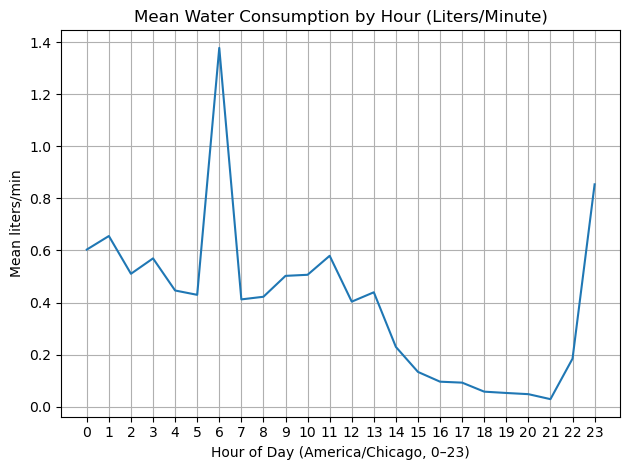

In [4]:
# Plot (matplotlib, single chart, no explicit colors or styles)
plt.figure()
plt.plot(hourly_mean['hour'], hourly_mean['liters_per_min'])
plt.title('Mean Water Consumption by Hour (Liters/Minute)')
plt.xlabel('Hour of Day (America/Chicago, 0–23)')
plt.ylabel('Mean liters/min')
plt.xticks(range(0, 24, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
df

,timestamp_utc,activity_label,consumption_m3_per_min,dishwasher_running,has_activity,occupied,total_m3,washing_machine_running,timestamp_local,liters_per_min,hour_local,weekday,is_weekend
0,2022-11-09 00:00:00+00:00,NaN,NaN,False,NaN,True,469.281,False,2022-11-08 18:00:00-06:00,NaN,18,1,False
1,2022-11-09 00:01:00+00:00,NaN,0.000,False,NaN,True,469.281,False,2022-11-08 18:01:00-06:00,0.0,18,1,False
2,2022-11-09 00:02:00+00:00,NaN,0.000,False,NaN,True,469.281,False,2022-11-08 18:02:00-06:00,0.0,18,1,False
3,2022-11-09 00:03:00+00:00,NaN,0.000,False,NaN,True,469.281,False,2022-11-08 18:03:00-06:00,0.0,18,1,False
4,2022-11-09 00:04:00+00:00,NaN,0.000,False,NaN,True,469.281,False,2022-11-08 18:04:00-06:00,0.0,18,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46868,2022-12-11 13:08:00+00:00,NaN,0.000,False,NaN,True,488.137,False,2022-12-11 07:08:00-06:00,0.0,7,6,True
46869,2022-12-11 13:09:00+00:00,NaN,0.000,False,NaN,True,488.137,False,2022-12-11 07:09:00-06:00,0.0,7,6,True
46870,2022-12-11 13:10:00+00:00,NaN,0.004,False,NaN,True,488.141,False,2022-12-11 07:10:00-06:00,4.0,7,6,True
46871,2022-12-11 13:11:00+00:00,NaN,0.005,False,NaN,True,488.146,False,2022-12-11 07:11:00-06:00,5.0,7,6,True


In [12]:
df['liters_per_min'].max()

1139.00000000001

In [18]:
df.head(175)

,timestamp_utc,activity_label,consumption_m3_per_min,dishwasher_running,has_activity,occupied,total_m3,washing_machine_running,timestamp_local,liters_per_min,hour_local,weekday,is_weekend
0,2022-11-09 00:00:00+00:00,NaN,NaN,False,NaN,True,469.281,False,2022-11-08 18:00:00-06:00,NaN,18,1,False
1,2022-11-09 00:01:00+00:00,NaN,0.000,False,NaN,True,469.281,False,2022-11-08 18:01:00-06:00,0.0,18,1,False
2,2022-11-09 00:02:00+00:00,NaN,0.000,False,NaN,True,469.281,False,2022-11-08 18:02:00-06:00,0.0,18,1,False
3,2022-11-09 00:03:00+00:00,NaN,0.000,False,NaN,True,469.281,False,2022-11-08 18:03:00-06:00,0.0,18,1,False
4,2022-11-09 00:04:00+00:00,NaN,0.000,False,NaN,True,469.281,False,2022-11-08 18:04:00-06:00,0.0,18,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,2022-11-09 02:50:00+00:00,NaN,0.004,False,NaN,True,469.289,False,2022-11-08 20:50:00-06:00,4.0,20,1,False
171,2022-11-09 02:51:00+00:00,NaN,0.006,False,NaN,True,469.295,False,2022-11-08 20:51:00-06:00,6.0,20,1,False
172,2022-11-09 02:52:00+00:00,NaN,0.000,False,NaN,True,469.295,False,2022-11-08 20:52:00-06:00,0.0,20,1,False
173,2022-11-09 02:53:00+00:00,NaN,0.000,False,NaN,True,469.295,False,2022-11-08 20:53:00-06:00,0.0,20,1,False


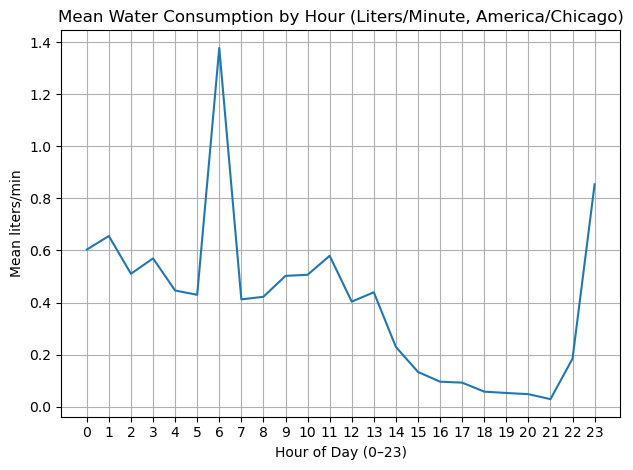

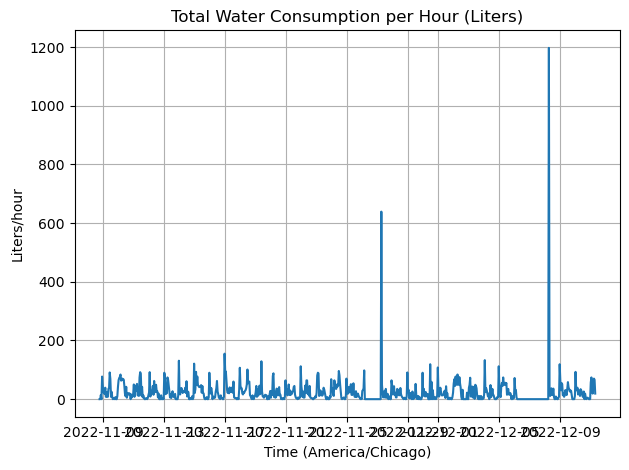

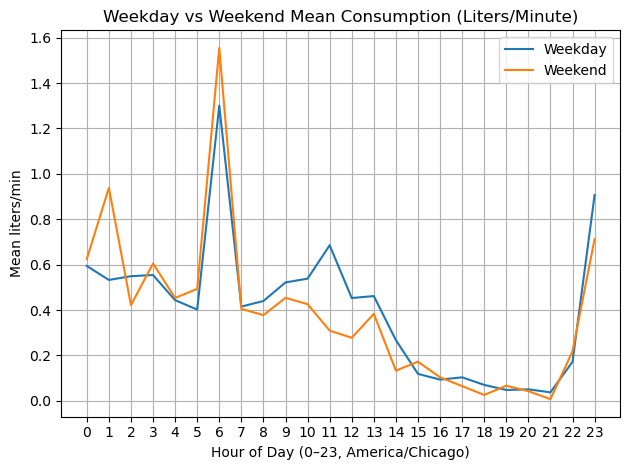

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Load dataset
paths = [Path("combined_minute_ALL.csv"), Path("combined_minute_with_occupancy_appliances.csv")]
for p in paths:
    if p.exists():
        combined_path = p
        break
else:
    raise FileNotFoundError("Upload combined_minute_ALL.csv or combined_minute_with_occupancy_appliances.csv.")

df = pd.read_csv(combined_path)
df["timestamp_utc"] = pd.to_datetime(df["timestamp_utc"], utc=True, errors="coerce")
df = df.dropna(subset=["timestamp_utc"]).sort_values("timestamp_utc")

# Convert to local timezone
df["timestamp_local"] = df["timestamp_utc"].dt.tz_convert("America/Chicago")

# Ensure we have consumption in liters
if "consumption_m3_per_min" not in df.columns:
    if "total_m3" in df.columns:
        df = df.set_index("timestamp_utc")
        df["consumption_m3_per_min"] = (
            df["total_m3"].resample("T").last().ffill().diff().clip(lower=0.0).values
        )
        df = df.reset_index()
    else:
        df["consumption_m3_per_min"] = 0.0

df["liters_per_min"] = df["consumption_m3_per_min"] * 1000.0

# --- 1. Mean consumption by hour of day (local) ---
df["hour_local"] = df["timestamp_local"].dt.hour
hourly_mean_local = df.groupby("hour_local", as_index=False)["liters_per_min"].mean()

plt.figure()
plt.plot(hourly_mean_local["hour_local"], hourly_mean_local["liters_per_min"])
plt.title("Mean Water Consumption by Hour (Liters/Minute, America/Chicago)")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Mean liters/min")
plt.xticks(range(0, 24, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 2. Total liters per hour (sum across minutes) ---
df_hourly_sum = df.set_index("timestamp_local").resample("H")["liters_per_min"].sum().reset_index()

plt.figure()
plt.plot(df_hourly_sum["timestamp_local"], df_hourly_sum["liters_per_min"])
plt.title("Total Water Consumption per Hour (Liters)")
plt.xlabel("Time (America/Chicago)")
plt.ylabel("Liters/hour")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 3. Weekday vs Weekend mean pattern ---
df["weekday"] = df["timestamp_local"].dt.weekday  # Monday=0 ... Sunday=6
df["is_weekend"] = df["weekday"] >= 5
hourly_week = df.groupby(["is_weekend", "hour_local"])["liters_per_min"].mean().reset_index()

plt.figure()
for flag, label in [(False, "Weekday"), (True, "Weekend")]:
    sub = hourly_week[hourly_week["is_weekend"] == flag]
    plt.plot(sub["hour_local"], sub["liters_per_min"], label=label)

plt.title("Weekday vs Weekend Mean Consumption (Liters/Minute)")
plt.xlabel("Hour of Day (0–23, America/Chicago)")
plt.ylabel("Mean liters/min")
plt.xticks(range(0, 24, 1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# # --- 4. UTC-based mean consumption for comparison ---
# df["hour_utc"] = df["timestamp_utc"].dt.hour
# hourly_mean_utc = df.groupby("hour_utc", as_index=False)["liters_per_min"].mean()

# plt.figure()
# plt.plot(hourly_mean_utc["hour_utc"], hourly_mean_utc["liters_per_min"])
# plt.title("Mean Water Consumption by Hour (Liters/Minute, UTC)")
# plt.xlabel("Hour of Day (0–23)")
# plt.ylabel("Mean liters/min")
# plt.xticks(range(0, 24, 1))
# plt.grid(True)
# plt.tight_layout()
# plt.show()


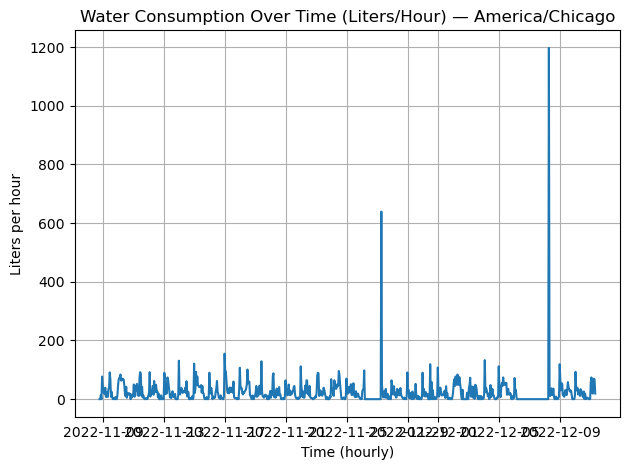

In [21]:
# === Plot liters/hour over entire timeline (≈1 month) ===
# - Loads your combined minute-level dataset
# - Converts m^3/min -> liters/min if needed
# - Aggregates to liters/hour on LOCAL time (America/Chicago)
# - Plots a continuous time series (one point per hour) across the whole dataset

import os
import pandas as pd
import matplotlib.pyplot as plt

# 1) Pick an available dataset
candidates = [
    "combined_minute_ALL.csv",
    "combined_minute_with_occupancy_appliances.csv",
]
csv_path = next((p for p in candidates if os.path.exists(p)), None)
if csv_path is None:
    raise FileNotFoundError(
        "Place 'combined_minute_ALL.csv' or 'combined_minute_with_occupancy_appliances.csv' in the working directory."
    )

# 2) Load & parse timestamps
df = pd.read_csv(csv_path)
df["timestamp_utc"] = pd.to_datetime(df["timestamp_utc"], utc=True, errors="coerce")
df = df.dropna(subset=["timestamp_utc"]).sort_values("timestamp_utc")

# 3) Ensure liters/min exists (derive from total_m3 if necessary)
if "consumption_m3_per_min" not in df.columns:
    if "total_m3" in df.columns:
        tmp = df.set_index("timestamp_utc").sort_index()
        total_min = tmp["total_m3"].resample("T").last().ffill()
        cons_m3_min = total_min.diff().clip(lower=0.0)
        tmp["consumption_m3_per_min"] = cons_m3_min.reindex(tmp.index).values
        df = tmp.reset_index()
    else:
        df["consumption_m3_per_min"] = 0.0

df["liters_per_min"] = df["consumption_m3_per_min"].fillna(0.0) * 1000.0

# 4) Convert to LOCAL time and aggregate to liters/hour
df["timestamp_local"] = df["timestamp_utc"].dt.tz_convert("America/Chicago")
# Floor to the start of each hour (LOCAL) and sum liters/min within that hour -> liters/hour
df["local_hour_start"] = df["timestamp_local"].dt.floor("H")
liters_per_hour = (
    df.groupby("local_hour_start", as_index=False)["liters_per_min"].sum()
    .rename(columns={"liters_per_min": "liters_per_hour"})
)

# 5) Plot timeline (one point per hour across entire dataset)
plt.figure()
plt.plot(liters_per_hour["local_hour_start"], liters_per_hour["liters_per_hour"])
plt.title("Water Consumption Over Time (Liters/Hour) — America/Chicago")
plt.xlabel("Time (hourly)")
plt.ylabel("Liters per hour")
plt.grid(True)
plt.tight_layout()
plt.show()

# (Optional) Save to CSV if you want:
# liters_per_hour.to_csv("liters_per_hour_timeseries.csv", index=False)
